# AI Computer Assignment 5 Phase 2 (Neural Network: TensorFlow & Keras)
Mohammad Saadati - 
_810198410_

## Introduction
Neural networks are one of the most powerful machine learning structures that have found many applications in various scientific and industrial fields in recent years due to the increasing computing power of processors. One of the advantages of these algorithms is that it makes it possible to construct any desired derivative function using only two hidden layers of neurons. Therefore, it is possible to implement and learn nonlinear functions with their help. Due to the recent advances in this structure and its increasing use in industry, very powerful frameworks have been offered to facilitate the creation of very complex and highly efficient neural networks. In this project, we intend to investigate some issues related to neural networks with the `TensorFlow` library and using the `Keras` high-level interface.

In this project, we intend to use neural networks to recognize the **English alphabet** based on their image.

[A-Z Handwritten Alphabets](https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format) is a collection of handwritten images of the English alphabet. This dataset contains 372,450 images along with their corresponding labels.

### Import Libraries
In this part, some of the necessary libraries were imported in order to use their helpful functions.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import cv2
from tensorflow.keras import *
from tensorflow.keras.utils import *
from sklearn.metrics import accuracy_score, classification_report
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Phase 1: Data review and preprocessing
Data splitting is an important phase, If we use whole data for both train and test our mesurments may not be precise,
because there may be overfitting on train data.
So we can split our data to train/test to handle this challenge, but again there is another problem.
First of all we have to divide our dataset to two parts trainset and testset so by using `train_test_split` method of `sklearn` and setting `test_size` we'll determine what percentage of our data is for test. For the division `train_test_split` fucntions from `sklearn.model_selection` is used which returns 4 dataset likes. Two are for the training data and two are for test data. And the dependent variable which here is the `type` feature.

The `P` ratio depends on lots of metrics but two important metrics to mention are the number of rows in our data and our data itself.
Assume that we have extremely small data in this situations small p may effect our learning accuracy.
In larger datasets we can do the split with more confidence. After reading some documents online I came to the understanding that 10% to 30% is a good percentage for test size and by experimenting different values I decided to use the value 20%.

Another important note to mention is randomness. We must shuffle our data so there is no learning from the sequence of data itself.
`random_state` is for getting the same set of data each time so that we don't get different results, meaning it won't give us random data each time. `random_state` is like the seed that we set for random. 

### Question 1:
First we load csv file as a DataFrame using pandas library.

In [3]:
# url='https://drive.google.com/file/d/1WIKPIjFiIjYwbKzeURBdiGQg-ubhCrOr/view?usp=sharing'
# path='https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

dataset_df = pd.read_csv('drive/My Drive/UT/Term6/AI/CA5-P2/A_Z Handwritten Data.csv')
dataset_df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Question 2:
Now we separate the data and the corresponding label of each of them and store them properly.

In [4]:
labels = dataset_df['0'] # .values.tolist()

In [5]:
data = dataset_df.drop(['0'], axis = 1)
data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Question 3:
Now resize the images to $28 * 28$. To do this, we use the `resize` function

In [6]:
# images = data.values.tolist()


# # X_train = [np.resize(image,(25 , 25)) for image in X_train]
# # X_test = [np.resize(image,(25 , 25)) for image in X_test]

# X_train = [cv2.resize(image, dsize=(25 , 25), interpolation=cv2.INTER_CUBIC) for image in X_train]
# X_test = [cv2.resize(image, dsize=(25 , 25), interpolation=cv2.INTER_CUBIC) for image in X_test]

# image = X_train[random.randint(0 , len(X_train) - 1)]

# plt.figure(figsize = (2 , 2))
# plt.imshow(image)
# plt.title("Random Image From data")
# plt.show()

# print("\nMinimum value in image: " + str(np.amin(image)))
# print("Maximum value in image: " + str(np.amax(image)))

### Question 4:
In this part, we print the number of data read and the number of available classes.

In [7]:
print("number of data read:", data.shape[0])
print("number of available classes:", labels.nunique())

number of data read: 372450
number of available classes: 26


### Question 5:
Now calculate the number of images in each category  and draw a bar chart for them.

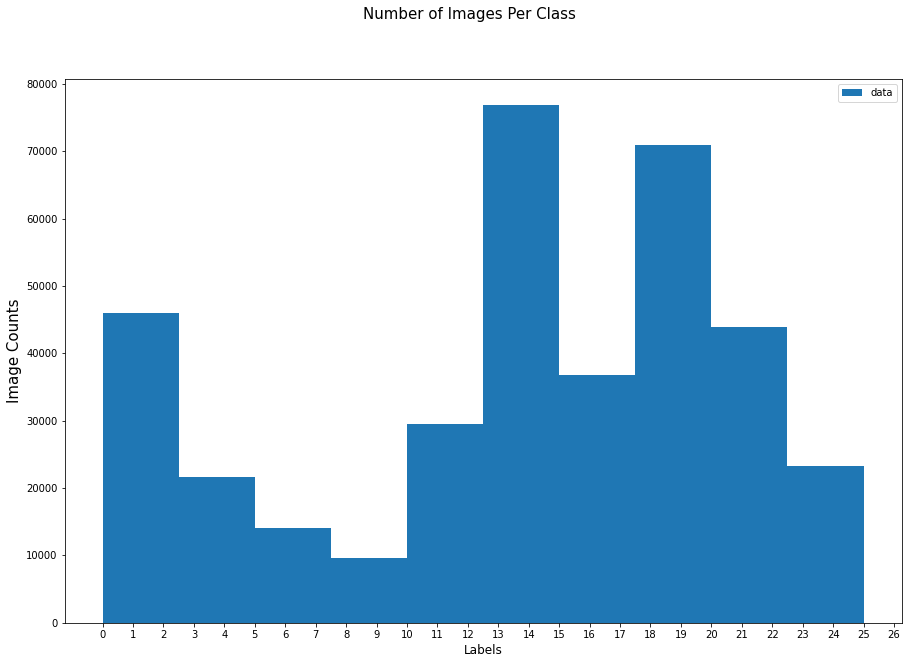

In [8]:
fig = plt.figure(figsize=(15, 10))
plt.hist((labels), label=['data'])
plt.xlabel('Labels', fontsize = 12)
plt.ylabel('Image Counts', fontsize = 15)
plt.suptitle('Number of Images Per Class', fontsize = 15)
plt.legend()
plt.xticks(range(0,27))
plt.show()

### Question 6:
In this part, we select and display an image of each class in the train data set. For each image, we display its type along with the image.

========== CLASS No. 0 ==========


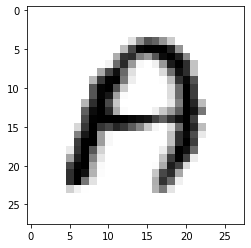

========== CLASS No. 1 ==========


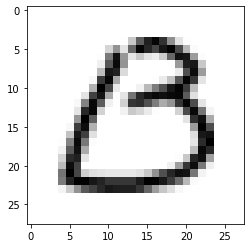

========== CLASS No. 2 ==========


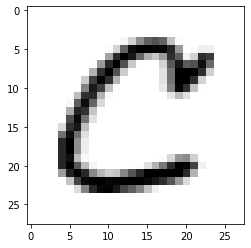

========== CLASS No. 3 ==========


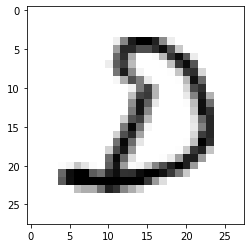

========== CLASS No. 4 ==========


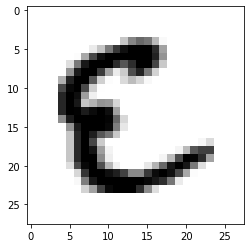

========== CLASS No. 5 ==========


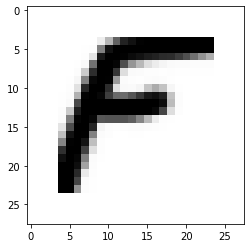

========== CLASS No. 6 ==========


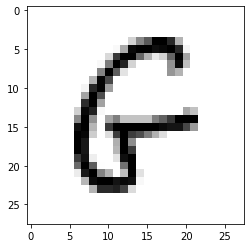

========== CLASS No. 7 ==========


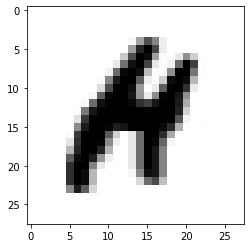

========== CLASS No. 8 ==========


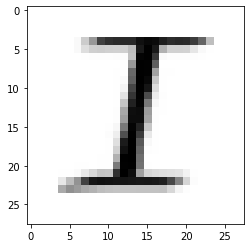

========== CLASS No. 9 ==========


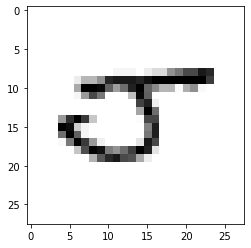

========== CLASS No. 10 ==========


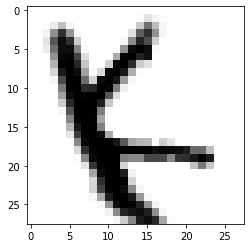

========== CLASS No. 11 ==========


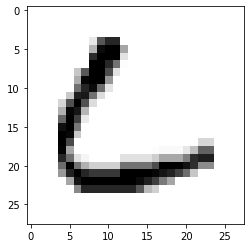

========== CLASS No. 12 ==========


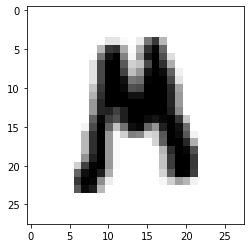

========== CLASS No. 13 ==========


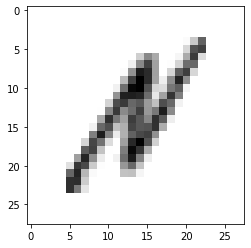

========== CLASS No. 14 ==========


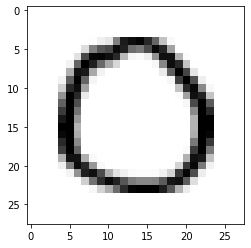

========== CLASS No. 15 ==========


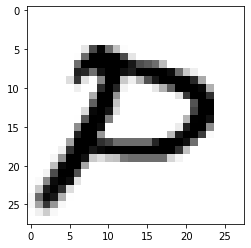

========== CLASS No. 16 ==========


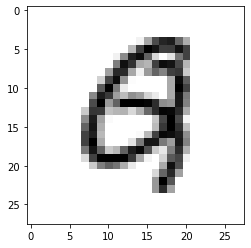

========== CLASS No. 17 ==========


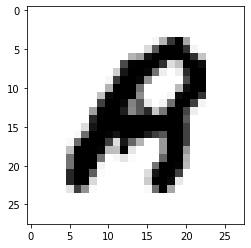

========== CLASS No. 18 ==========


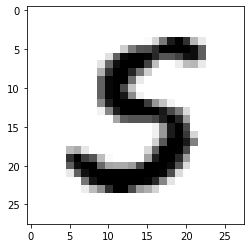

========== CLASS No. 19 ==========


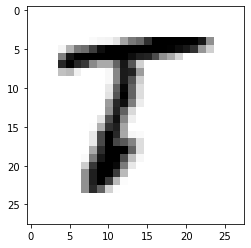

========== CLASS No. 20 ==========


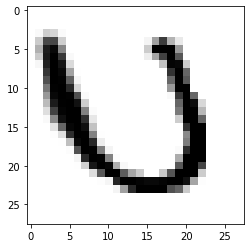

========== CLASS No. 21 ==========


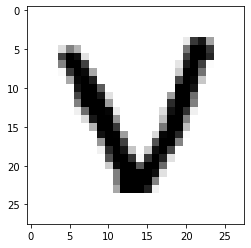

========== CLASS No. 22 ==========


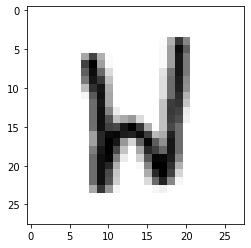

========== CLASS No. 23 ==========


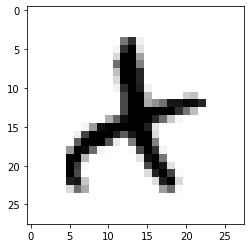

========== CLASS No. 24 ==========


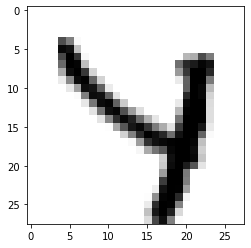

========== CLASS No. 25 ==========


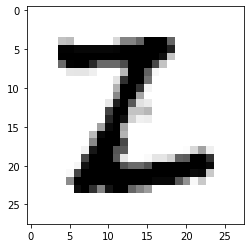

In [9]:
for i in range(26):
    dd = dataset_df[dataset_df['0']==i].iloc[1]
    x = dd[1:].values
    x = x.reshape((28, 28))
    print("========== CLASS No.",str(i),"==========")
    plt.imshow(x, cmap='binary')
    plt.show()

# for i in range(0,10):
#     index = 0
#     while Y_train[index] != i:
#         index += 1
#     image = X_train[index]
#     print("========== CLASS No.",str(i),"==========")
#     plt.figure(figsize = (2 , 2))
#     plt.imshow(image)
#     plt.title(i)
#     plt.show()

### Question 7:
Data splitting is an important phase, If we use whole data for both train and test our mesurments may not be precise,
because there may be overfitting on train data.
So we can split our data to train/test to handle this challenge, but again there is another problem.
First of all we have to divide our dataset to two parts trainset and testset so by using `train_test_split` method of `sklearn` and setting `test_size` we'll determine what percentage of our data is for test. For the division `train_test_split` fucntions from `sklearn.model_selection` is used which returns 4 dataset likes. Two are for the training data and two are for test data. And the dependent variable which here is the `type` feature.

The `P` ratio depends on lots of metrics but two important metrics to mention are the number of rows in our data and our data itself.
Assume that we have extremely small data in this situations small p may effect our learning accuracy.
In larger datasets we can do the split with more confidence. After reading some documents online I came to the understanding that 10% to 30% is a good percentage for test size and by experimenting different values I decided to use the value 20%.

Another important note to mention is randomness. We must shuffle our data so there is no learning from the sequence of data itself.
`random_state` is for getting the same set of data each time so that we don't get different results, meaning it won't give us random data each time. `random_state` is like the seed that we set for random. 

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(data , labels , test_size = 0.20 , random_state = 42)

### Question 8:
Some algorithms can work with categorical data directly.

For example, a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation).

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

In general, this is mostly a constraint of the efficient implementation of machine learning algorithms rather than hard limitations on the algorithms themselves.

This means that categorical data must be converted to a numerical form. If the categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application.

There are different ways for handling categirical data.
* <b>Label Encoders:</b> Assigining numbers to each categorical value. 
* <b>One Hot Encoding:</b>  The basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set. There are also other ways but here we choose to apply one Hot-Encode to categorical variables.
* <b>Ordinal Encoding:</b> We use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important. Hence encoding should reflect the sequence.

Label Encoders aren't a good option when we have no particular ordering in our categories. In these cases, we can use One Hot Encoding which takes a lot of memory since it is adding a new column for each new category. For categorical variables where no such ordinal relationship exists, the integer encoding is not enough. In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In [11]:
brand_one_hot = pd.get_dummies(Y_train)
Y_train = pd.concat([Y_train, brand_one_hot], axis = 1)
Y_train = Y_train.iloc[: , 1:]

brand_one_hot = pd.get_dummies(Y_test)
Y_test = pd.concat([Y_test, brand_one_hot], axis = 1)
Y_test = Y_test.iloc[: , 1:]

# brand_one_hot = pd.get_dummies(labels)
# labels = pd.concat([labels, brand_one_hot], axis = 1)
# labels = labels.iloc[: , 1:]
# labels

## Phase 2: Neural network design

In [12]:
def create_nn_model():
    # input = keras.layers.Input(shape=(28,28,1))
    input = keras.layers.Input(shape=(784))
    output = keras.layers.Flatten()(input)
    output = keras.layers.Dense(1024, activation='relu')(output)
    output = keras.layers.Dense(512, activation='relu')(output)
    output = keras.layers.Dense(26, activation='softmax')(output)
    model = keras.models.Model(inputs=input, outputs=output)
    model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
model = create_nn_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 26)                13338     
                                                                 
Total params: 1,341,978
Trainable params: 1,341,978
Non-trainable params: 0
_________________________________________________________________


### Model analysis
`summary()` is used to show each layers parameters. summary() will show useful information such as layers and their order in the model, output shape of each layer , number of parameters(weights) in each layer and total number of parameters(weights) in the model.

For the network above first we have flatten the input, so (28, 28) will become (1, 784) which we will show as 784, then we have 1024 neurons in the first layer. So we had 784 neurons in the previous layer and 2048 in this layer. Also we have a bias vector with size of number of the neurons in this layer. Finally putting all of this together we will have the following number of parameters for this layer:

$ 784 * 1024 + 1024 = 803840 $

The number above is equal to the number given by `summary()`.

The calculations for the next layer is exactly the same except the layers will change. 784 will change to 1024 and 1024 will change to 512 also in the new layer the bias size will be 512 so we'll have the following number of parameters for the second hidden layer:

$ 1024 * 512 + 512 = 524800 $

Like before the number above is equal to the corresponding number given by `summary()`.

For the ouput layer the calculations is exactly the same as before but some number's will change as following:

$ 512 * 26 + 26 = 13338 $

Like before the number above is equal to the corresponding number given by `summary()`.

All the parameters are calculated so in total we'll have:

$ 803840 + 524800 + 13338 = 1341978 $

Also the same as `summary()`.

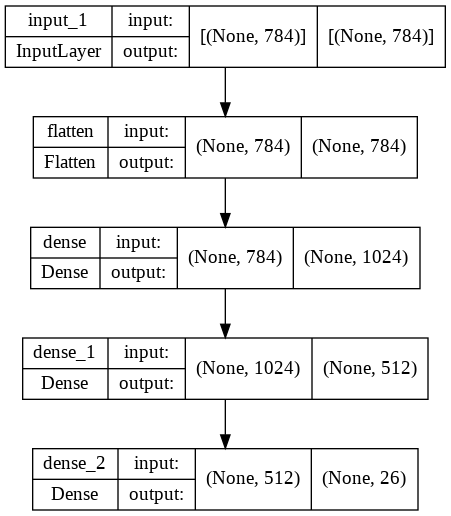

In [14]:
utils.plot_model(model, show_shapes=True, expand_nested=True)

In [17]:
with tf.device('/device:GPU:0'):
  history = model.fit(X_train, Y_train , epochs = 10, batch_size=32)

/bin/bash: del: command not found
Epoch 1/10
1988/9312 [=====>........................] - ETA: 1:58 - loss: nan - accuracy: 0.0367

KeyboardInterrupt: ignored

## Phase 3: Data Classification
In this section, we have to practice the neural network created on the data.

In [ ]:
def expand_pixels_numbers(inp):
    r = []
    for i in inp:
        rr = []
        for j in i:
            for k in j:
                rr.append(k)
        r.append(rr)
    return r

In [ ]:
X_train, X_test = expand_pixels_numbers(X_train.tolist()), expand_pixels_numbers(X_test.tolist())

In [ ]:
X_train = pd.DataFrame(data=X_train, columns=["PixelNo. %i" % x for x in range(1, 25*25 + 1)])
X_test = pd.DataFrame(data=X_test, columns=["PixelNo.%i" % x for x in range(1, 25*25 + 1)])

In [39]:
Y_train = pd.DataFrame(data=Y_train.tolist(), columns=["labels"])
Y_test = pd.DataFrame(data=Y_test.tolist(), columns=["labels"])

AttributeError: ignored

### Training Sample Code

In [ ]:
# Sample code for building and training a model

INPUT_SHAPE = 25*25
LEARNING_RATE = 0.001
EPOCHS = 15
BATCH_SIZE = 32

TRAINLOADER = [batch for batch in Dataloader(X_train, Y_train, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]
TESTLOADER = [batch for batch in Dataloader(X_test, Y_test, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]

In [ ]:
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

In [ ]:
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 90.25376123485736	Average Loss: 0.3847507155842545
	Test: Average Accuracy: 95.40336277173913	Average Loss: 0.16517450651996887
Epoch 2:
	Train: Average Accuracy: 95.92858538491598	Average Loss: 0.14607685632193385
	Test: Average Accuracy: 96.09183933423913	Average Loss: 0.1411680770126691
Epoch 3:
	Train: Average Accuracy: 96.43293278624462	Average Loss: 0.12781926650468778
	Test: Average Accuracy: 96.39945652173913	Average Loss: 0.12976647168762795
Epoch 4:
	Train: Average Accuracy: 96.6857170769832	Average Loss: 0.1175970304556995
	Test: Average Accuracy: 96.58500339673913	Average Loss: 0.12378535091928833
Epoch 5:
	Train: Average Accuracy: 96.87866354044549	Average Loss: 0.11112524466371168
	Test: Average Accuracy: 96.72660495923913	Average Loss: 0.12027969300025414
Epoch 6:
	Train: Average Accuracy: 96.98700664322001	Average Loss: 0.10666944247178473
	Test: Average Accuracy: 96.79008152173913	Average Loss: 0.11809938645626379
Epoch 7:
	Train: Ave

### Part I: Network training

The neural network that I implemented consists of `1` input layer, `1` hidden layer and `1` output layer. `625` input nodes, `45` hidden nodes and `10` output nodes corresponding to `10` labels that we have.

I have tried higher number of hidden nodes and it'll result in higher accuracy.

In [ ]:
INPUT_SHAPE = 25*25
LEARNING_RATE = 0.00003
EPOCHS = 15
BATCH_SIZE = 32

print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
# network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  3e-05 

Epoch 1:
	Train: Average Accuracy: 23.289566236811254	Average Loss: 2.0736098020554894
	Test: Average Accuracy: 55.7963230298913	Average Loss: 1.6387305587625103
Epoch 2:
	Train: Average Accuracy: 72.89385502149277	Average Loss: 1.1497983239585663
	Test: Average Accuracy: 80.40463654891305	Average Loss: 0.800214571363633
Epoch 3:
	Train: Average Accuracy: 83.68088120359515	Average Loss: 0.6359390133996106
	Test: Average Accuracy: 85.61353600543478	Average Loss: 0.5249838467810047
Epoch 4:
	Train: Average Accuracy: 86.9527647518562	Average Loss: 0.4570189281297503
	Test: Average Accuracy: 88.29122792119566	Average Loss: 0.4081770419265366
Epoch 5:
	Train: Average Accuracy: 89.26289566236811	Average Loss: 0.36835420370536626
	Test: Average Accuracy: 90.14266304347827	Average Loss: 0.3421507959017568
Epoch 6:
	Train: Average Accuracy: 91.09222352481439	Average Loss: 0.31479696836332105
	Test: Average Accuracy: 91.48246433423913	Average Loss: 0.30068412701764424
Ep

### Part II : Network Weighting

If zero initial weights are chosen, then the learning rate has no influence on a neuron's predicted class label. If you initialize all weights with zeros then every hidden unit will get zero independent of the input since the weight matrix is all zeros and multiplication will result in zero. So, when all the hidden neurons start with the zero weights, then all of them will follow the same gradient and for this reason starting with zeros affects only the scale of the weight vector, not the direction. Also, having zero weights to start with will prevent the network from learning. The errors backpropagated through the network is proportional to the value of the weights. If all the weights are the same, then the backpropagated errors will be the same, so all of the weights will be updated by the same amount which means the whole process was useless. To avoid this problem, the initial weights of the network should be unequal a way of doing this is to assign random values to weights.

In [ ]:
LEARNING_RATE = 0.001

network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='zero')
# network.add_layer(40, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='zero')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 90.17682688550215	Average Loss: 0.38364604410908426
	Test: Average Accuracy: 95.33988620923913	Average Loss: 0.16878484023433798
Epoch 2:
	Train: Average Accuracy: 95.91637358343102	Average Loss: 0.1490250460965128
	Test: Average Accuracy: 95.96488620923913	Average Loss: 0.14629975487150587
Epoch 3:
	Train: Average Accuracy: 96.36332551778038	Average Loss: 0.13202452831262837
	Test: Average Accuracy: 96.26273777173913	Average Loss: 0.1360529592766703
Epoch 4:
	Train: Average Accuracy: 96.6295427901524	Average Loss: 0.1223523085913539
	Test: Average Accuracy: 96.44828464673913	Average Loss: 0.12957372090015856
Epoch 5:
	Train: Average Accuracy: 96.76997850722938	Average Loss: 0.11565806597194758
	Test: Average Accuracy: 96.57035495923913	Average Loss: 0.12502189327395888
Epoch 6:
	Train: Average Accuracy: 96.88354826103946	Average Loss: 0.11058329464724916
	Test: Average Accuracy: 96.66312839673913	Average Loss: 0.1216738106039144
Epoch 7:
	Train: Aver

### Part III : Impact of learning rate

In this section, by decreasing and increasing the `learning rate` parameter, we will train the network and find the optimal value for our network

The learning rate controls how quickly the model is adapted to the problem. Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs.

In [ ]:
LEARNING_RATE = 0.00001
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  1e-05 

Epoch 1:
	Train: Average Accuracy: 10.591441969519343	Average Loss: 2.2466900533232654
	Test: Average Accuracy: 9.710852581521738	Average Loss: 2.2089612944835153
Epoch 2:
	Train: Average Accuracy: 16.028819851504494	Average Loss: 2.1295537790917654
	Test: Average Accuracy: 19.875806725543477	Average Loss: 2.0223153030143104
Epoch 3:
	Train: Average Accuracy: 45.53648886283705	Average Loss: 1.8388027538432543
	Test: Average Accuracy: 63.32668138586956	Average Loss: 1.6391340213917907
Epoch 4:
	Train: Average Accuracy: 67.99135404454866	Average Loss: 1.43469815919188
	Test: Average Accuracy: 73.45639436141305	Average Loss: 1.2545685322308633
Epoch 5:
	Train: Average Accuracy: 76.39375732708089	Average Loss: 1.1028172981289395
	Test: Average Accuracy: 78.30502717391305	Average Loss: 0.9768053163423216
Epoch 6:
	Train: Average Accuracy: 80.36381398983978	Average Loss: 0.8724730893094429
	Test: Average Accuracy: 81.2073284646739	Average Loss: 0.7896508912287777
Epo

In [ ]:
LEARNING_RATE = 0.00005
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  5e-05 

Epoch 1:
	Train: Average Accuracy: 41.808372411098084	Average Loss: 1.7554768104982963
	Test: Average Accuracy: 76.28354279891305	Average Loss: 0.9674776260524347
Epoch 2:
	Train: Average Accuracy: 82.80075224697147	Average Loss: 0.6562929152283555
	Test: Average Accuracy: 86.20923913043478	Average Loss: 0.48307906069369394
Epoch 3:
	Train: Average Accuracy: 88.22034974599453	Average Loss: 0.40204203973018254
	Test: Average Accuracy: 89.96008831521739	Average Loss: 0.346350705671976
Epoch 4:
	Train: Average Accuracy: 91.29684447049628	Average Loss: 0.30628005100672434
	Test: Average Accuracy: 92.00980808423913	Average Loss: 0.28280734674927305
Epoch 5:
	Train: Average Accuracy: 92.77691481047285	Average Loss: 0.25861911864489223
	Test: Average Accuracy: 92.97660495923913	Average Loss: 0.2492068630300055
Epoch 6:
	Train: Average Accuracy: 93.5441578741696	Average Loss: 0.23164872485689308
	Test: Average Accuracy: 93.44535495923913	Average Loss: 0.228676854309811

In [ ]:
LEARNING_RATE = 0.00010
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  0.0001 

Epoch 1:
	Train: Average Accuracy: 62.15792301680344	Average Loss: 1.1977544967105684
	Test: Average Accuracy: 86.7786175271739	Average Loss: 0.459590419361643
Epoch 2:
	Train: Average Accuracy: 90.07932786244626	Average Loss: 0.3432977172325228
	Test: Average Accuracy: 92.20023777173913	Average Loss: 0.2781754992341346
Epoch 3:
	Train: Average Accuracy: 93.16036537710043	Average Loss: 0.244558237709375
	Test: Average Accuracy: 93.47465183423913	Average Loss: 0.22825997548718985
Epoch 4:
	Train: Average Accuracy: 94.06193825713169	Average Loss: 0.20958440806090203
	Test: Average Accuracy: 94.08500339673913	Average Loss: 0.2046119031271985
Epoch 5:
	Train: Average Accuracy: 94.59559398202423	Average Loss: 0.19086564398252523
	Test: Average Accuracy: 94.50004245923913	Average Loss: 0.19026576720988492
Epoch 6:
	Train: Average Accuracy: 94.96927510746386	Average Loss: 0.1787475132347079
	Test: Average Accuracy: 94.89555027173913	Average Loss: 0.18046471693702548


In [ ]:
LEARNING_RATE = 0.00015
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  0.00015 

Epoch 1:
	Train: Average Accuracy: 68.92936694021103	Average Loss: 0.9595695082543022
	Test: Average Accuracy: 89.65140964673913	Average Loss: 0.3475968967364872
Epoch 2:
	Train: Average Accuracy: 92.29210629152013	Average Loss: 0.2694313441303663
	Test: Average Accuracy: 93.33793308423913	Average Loss: 0.22966303800696503
Epoch 3:
	Train: Average Accuracy: 94.09368894099258	Average Loss: 0.20599775100324075
	Test: Average Accuracy: 94.20707370923913	Average Loss: 0.19701528531536525
Epoch 4:
	Train: Average Accuracy: 94.8215123094959	Average Loss: 0.18216087254358487
	Test: Average Accuracy: 94.81742527173913	Average Loss: 0.18049607738869927
Epoch 5:
	Train: Average Accuracy: 95.20530480656507	Average Loss: 0.16873350952007266
	Test: Average Accuracy: 95.13969089673913	Average Loss: 0.17029152206729656
Epoch 6:
	Train: Average Accuracy: 95.48251270027355	Average Loss: 0.15984030652944523
	Test: Average Accuracy: 95.38383152173913	Average Loss: 0.16323490376

In [ ]:
LEARNING_RATE = 0.00025
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  0.00025 

Epoch 1:
	Train: Average Accuracy: 77.01025791324736	Average Loss: 0.7274639370868651
	Test: Average Accuracy: 92.99125339673913	Average Loss: 0.2463735688300897
Epoch 2:
	Train: Average Accuracy: 94.03751465416178	Average Loss: 0.2082062464261714
	Test: Average Accuracy: 94.46097995923913	Average Loss: 0.19142385550284596
Epoch 3:
	Train: Average Accuracy: 95.01357952325127	Average Loss: 0.1747389508045845
	Test: Average Accuracy: 95.10062839673913	Average Loss: 0.17204388836391654
Epoch 4:
	Train: Average Accuracy: 95.51059984368894	Average Loss: 0.1597833812909417
	Test: Average Accuracy: 95.46195652173913	Average Loss: 0.16142150059789717
Epoch 5:
	Train: Average Accuracy: 95.79669792887847	Average Loss: 0.1506373131370737
	Test: Average Accuracy: 95.67680027173913	Average Loss: 0.15440997790840885
Epoch 6:
	Train: Average Accuracy: 96.01162563501367	Average Loss: 0.14417608796457088
	Test: Average Accuracy: 95.83793308423913	Average Loss: 0.1492910915706

In [ ]:
LEARNING_RATE = 0.0005
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  0.0005 

Epoch 1:
	Train: Average Accuracy: 84.89087534193044	Average Loss: 0.5352639300004786
	Test: Average Accuracy: 94.51957370923913	Average Loss: 0.19505098645459523
Epoch 2:
	Train: Average Accuracy: 95.20808909730363	Average Loss: 0.17051989390121577
	Test: Average Accuracy: 95.53519870923913	Average Loss: 0.16324918648764064
Epoch 3:
	Train: Average Accuracy: 95.8675263774912	Average Loss: 0.14952086514737892
	Test: Average Accuracy: 95.81840183423913	Average Loss: 0.15031617903941735
Epoch 4:
	Train: Average Accuracy: 96.18503321610004	Average Loss: 0.1388704727029377
	Test: Average Accuracy: 96.05277683423913	Average Loss: 0.14266869335959992
Epoch 5:
	Train: Average Accuracy: 96.37553731926533	Average Loss: 0.13185901598019767
	Test: Average Accuracy: 96.16508152173913	Average Loss: 0.13740153757316256
Epoch 6:
	Train: Average Accuracy: 96.5220789370848	Average Loss: 0.12667065176325495
	Test: Average Accuracy: 96.33109714673913	Average Loss: 0.133472801449

In [ ]:
LEARNING_RATE = 0.0015
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  0.0015 

Epoch 1:
	Train: Average Accuracy: 91.94143220007815	Average Loss: 0.325068516506477
	Test: Average Accuracy: 95.58890964673913	Average Loss: 0.15626129210516837
Epoch 2:
	Train: Average Accuracy: 96.02627979679562	Average Loss: 0.13894698069321704
	Test: Average Accuracy: 96.14066745923913	Average Loss: 0.13854673481605756
Epoch 3:
	Train: Average Accuracy: 96.42926924579913	Average Loss: 0.12532564290555218
	Test: Average Accuracy: 96.32133152173913	Average Loss: 0.13100460034645373
Epoch 4:
	Train: Average Accuracy: 96.60878272762798	Average Loss: 0.11781699908944834
	Test: Average Accuracy: 96.37015964673913	Average Loss: 0.12674171425172592
Epoch 5:
	Train: Average Accuracy: 96.75654552559594	Average Loss: 0.1129938322486753
	Test: Average Accuracy: 96.46484375	Average Loss: 0.12475506256741946
Epoch 6:
	Train: Average Accuracy: 96.82371043376318	Average Loss: 0.1098713917400154
	Test: Average Accuracy: 96.4599609375	Average Loss: 0.12456947879103215
Epoc

In [ ]:
LEARNING_RATE = 0.0035
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  0.0035 

Epoch 1:
	Train: Average Accuracy: 9.945095740523643	Average Loss: 2.3386514186297283
	Test: Average Accuracy: 9.8291015625	Average Loss: 2.3030106611142402
Epoch 2:
	Train: Average Accuracy: 9.919450957405237	Average Loss: 2.3033473519251104
	Test: Average Accuracy: 9.8291015625	Average Loss: 2.3030106611142407
Epoch 3:
	Train: Average Accuracy: 9.919450957405237	Average Loss: 2.3033473519251104
	Test: Average Accuracy: 9.8291015625	Average Loss: 2.3030106611142407
Epoch 4:
	Train: Average Accuracy: 9.919450957405237	Average Loss: 2.3033473519251104
	Test: Average Accuracy: 9.8291015625	Average Loss: 2.3030106611142407
Epoch 5:
	Train: Average Accuracy: 9.919450957405237	Average Loss: 2.3033473519251104
	Test: Average Accuracy: 9.8291015625	Average Loss: 2.3030106611142407
Epoch 6:
	Train: Average Accuracy: 9.919450957405237	Average Loss: 2.3033473519251104
	Test: Average Accuracy: 9.8291015625	Average Loss: 2.3030106611142407
Epoch 7:
	Train: Average Accurac

By checking multiple values for learning rate, optimal `learning rate` was around $0.0005$

**Learning Rate * 0.1**

Now, when we multiplied the optimum learning rate by 0.1, the speed of the learning process decreased and it seems that we need more epochs to converge to the highest accuracy.

In [ ]:
LEARNING_RATE = 0.0005 * 0.1
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  5e-05 

Epoch 1:
	Train: Average Accuracy: 41.22552754982415	Average Loss: 1.7709733852909857
	Test: Average Accuracy: 75.64877717391305	Average Loss: 0.9664271336603859
Epoch 2:
	Train: Average Accuracy: 83.2550312622118	Average Loss: 0.6476271075822522
	Test: Average Accuracy: 86.78243885869566	Average Loss: 0.47261168655817887
Epoch 3:
	Train: Average Accuracy: 88.65596912856584	Average Loss: 0.3915423404001563
	Test: Average Accuracy: 90.36727241847827	Average Loss: 0.33702704137808287
Epoch 4:
	Train: Average Accuracy: 91.59202813599062	Average Loss: 0.29867778452229915
	Test: Average Accuracy: 92.25883152173913	Average Loss: 0.27696363501248045
Epoch 5:
	Train: Average Accuracy: 93.00405431809301	Average Loss: 0.2540087304948382
	Test: Average Accuracy: 93.11332370923913	Average Loss: 0.2455606936666813
Epoch 6:
	Train: Average Accuracy: 93.60853849159828	Average Loss: 0.22873702539452612
	Test: Average Accuracy: 93.60160495923913	Average Loss: 0.2262356226051235

**Learning Rate * 10**

Now, when we multiplied the optimum learning rate by 10, we faced with the problem of dying *Relu* and its obvious because weight will increase and it can cuase in vanishing in gradients. We can see that there is a small change between accuracies of different epochs.

In [ ]:
LEARNING_RATE = 0.0005 * 10
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  0.005 

Epoch 1:


<ipython-input-11-d711fd6e7fb3>:33: RuntimeWarning: divide by zero encountered in log
  output = np.log(Softmax()(temp))
<ipython-input-11-d711fd6e7fb3>:36: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_value =  -1 * np.sum(np.multiply(expected, output), axis=1)
<ipython-input-10-79141a531a0a>:254: RuntimeWarning: invalid value encountered in true_divide
  softmax_value /= softmax_value.sum(axis=1)


	Train: Average Accuracy: 14.118210238374365	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 2:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 3:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 4:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 5:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 6:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 7:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 8:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Averag

KeyboardInterrupt: 

If the learning rate is low, then training is more reliable, but optimization will take a lot of time because steps towards the minimum of the loss function are tiny. If the learning rate is high, then training may not converge or even diverge. Weight changes can be so big that the optimizer overshoots the minimum and makes the loss worse.

### Part IV :  Impact of activation function

In this part, we measure the performance of the network designed in the first part using different *Activation Functions* and compare the results.

#### Sigmoid

In [ ]:
LEARNING_RATE = 0.0005

network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 10.008597108245409	Average Loss: 2.3077785097494017
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.3082613335348703
Epoch 2:
	Train: Average Accuracy: 10.079425556858148	Average Loss: 2.3074806790758844
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.3079029044434223
Epoch 3:
	Train: Average Accuracy: 10.151475185619383	Average Loss: 2.306946106222399
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.307059488690497
Epoch 4:
	Train: Average Accuracy: 11.53243454474404	Average Loss: 2.2972363430813316
	Test: Average Accuracy: 20.110181725543477	Average Loss: 2.209969634128515
Epoch 5:
	Train: Average Accuracy: 35.60829425556858	Average Loss: 1.885498043867659
	Test: Average Accuracy: 60.5570652173913	Average Loss: 1.520587147962552
Epoch 6:
	Train: Average Accuracy: 76.52808714341539	Average Loss: 1.1138553055345608
	Test: Average Accuracy: 87.29598335597827	Average Loss: 0.7675046415319997
Epoch 7:
	Train: Average Ac

#### Hyperbolic Tangent

In [ ]:
network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Tanh(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 10.029357170769831	Average Loss: 2.3079229399480825
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.3085443941909256
Epoch 2:
	Train: Average Accuracy: 10.030578350918328	Average Loss: 2.307928465864414
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.308542868877603
Epoch 3:
	Train: Average Accuracy: 10.030578350918328	Average Loss: 2.3079269102553512
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.308541283763291
Epoch 4:
	Train: Average Accuracy: 10.031799531066824	Average Loss: 2.307925285909991
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.3085396214502567
Epoch 5:
	Train: Average Accuracy: 10.031799531066824	Average Loss: 2.3079235735808648
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.308537860724168
Epoch 6:
	Train: Average Accuracy: 10.031799531066824	Average Loss: 2.307921749434429
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.308535974941563
Epoch 7:
	Train: Averag

#### Leaky ReLU

In [ ]:
LEARNING_RATE = 0.0005

network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 85.20437670965221	Average Loss: 0.5271404441120265
	Test: Average Accuracy: 94.37797214673913	Average Loss: 0.1929533664790133
Epoch 2:
	Train: Average Accuracy: 95.2447245017585	Average Loss: 0.16835723883015774
	Test: Average Accuracy: 95.50590183423913	Average Loss: 0.16088865423448015
Epoch 3:
	Train: Average Accuracy: 95.90904650254005	Average Loss: 0.14645126677361
	Test: Average Accuracy: 95.83305027173913	Average Loss: 0.14658863778564651
Epoch 4:
	Train: Average Accuracy: 96.330353653771	Average Loss: 0.13373014913246103
	Test: Average Accuracy: 96.17484714673913	Average Loss: 0.1360607215535538
Epoch 5:
	Train: Average Accuracy: 96.64297577178586	Average Loss: 0.12313682981831421
	Test: Average Accuracy: 96.46293308423913	Average Loss: 0.12702076608682178
Epoch 6:
	Train: Average Accuracy: 96.88843298163346	Average Loss: 0.11379863253678109
	Test: Average Accuracy: 96.73637058423913	Average Loss: 0.11908866460878716
Epoch 7:
	Train: Average 

#### Why Sigmoid and Tanh do not work well?
In Tanh and Sigmoid moving towards the ends of the function, y values react very little to the changes in x so the derivative values in these regions are very small and converge to 0. This is called the vanishing gradient and the learning is minimal meaning that it makes the learning process be very slow or even useless. We know that if 0, not any learning. When slow learning occurs, the optimization algorithm that minimizes error can be attached to local minimum values and cannot get maximum performance from the artificial neural network model.

So by the explanation above Tanh and Sigmoid will result in vanishing gradient meaning that after a while the learning process will be very slow. So since we are using Stochastic Gradient Descent, these activation functions, Sigmoid and Tanh, won't be the best choice.

#### Why Leaky-Relu is better than Relu?
Unlike Relu, LeakyRelu is more balanced and may therefore learn faster. Also LeakyRelu fixes the dying Relu problem, as it doesn’t have zero-slope parts.

Dying relu problem: A Relu neuron is dead if it’s stuck in the negative side and always outputs 0. Because the slope of Relu in the negative range is also 0, once a neuron gets negative, it’s unlikely for it to recover. Such neurons are not playing any role in discriminating the input and is essentially useless. Over the time you may end up with a large part of your network doing nothing.

Since LeakyRelu assigns a small non zero value for negative parts this will result in solving the problem mentioned above and this is the main advantage of LeakyRelu.

LeakyRelu and Relu results are really close to each other but LeakyRelu result value is a bit higher so at the end I chose LeakyRelu.

### Part V : Impact of batch size

#### Setting Batch-Size to 16
In this part, when we set the `batch-size` to $16$, the speed of learning increased and our model reached to the desirable accuracy faster. It is obvious that the more batches we train our model, the more weight updates are performed and we get better results.

In [ ]:
LEARNING_RATE = 0.0005 
print("Learning Rate = ", LEARNING_RATE, "\n")

BATCH_SIZE = 16
print("Batch Size = ", BATCH_SIZE, "\n")


network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  0.0005 

Batch Size =  16 

Epoch 1:
	Train: Average Accuracy: 85.10580304806565	Average Loss: 0.5266641673882863
	Test: Average Accuracy: 94.43168308423913	Average Loss: 0.1925196707357448
Epoch 2:
	Train: Average Accuracy: 95.26514263384135	Average Loss: 0.1671754029292132
	Test: Average Accuracy: 95.54496433423913	Average Loss: 0.15894760451333179
Epoch 3:
	Train: Average Accuracy: 96.00063501367721	Average Loss: 0.1438931018904264
	Test: Average Accuracy: 95.95023777173913	Average Loss: 0.14286003517962156
Epoch 4:
	Train: Average Accuracy: 96.45857756936303	Average Loss: 0.12996769015756285
	Test: Average Accuracy: 96.37504245923913	Average Loss: 0.1310467066240194
Epoch 5:
	Train: Average Accuracy: 96.77852676826886	Average Loss: 0.11891119766821706
	Test: Average Accuracy: 96.66801120923913	Average Loss: 0.12133601796990638
Epoch 6:
	Train: Average Accuracy: 97.07893708479875	Average Loss: 0.1094457486764115
	Test: Average Accuracy: 96.94144870923913	Average Los

#### Setting Batch-Size to 256
In this part, when we set the `batch-size` to $256$, the speed of learning decreased. So, it is better to use smaller batch size to make the process of learning faster.

In [ ]:
BATCH_SIZE = 256
print("Batch Size = ", BATCH_SIZE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Batch Size =  256 

Epoch 1:
	Train: Average Accuracy: 85.29909144196952	Average Loss: 0.5214287919915146
	Test: Average Accuracy: 94.42191745923913	Average Loss: 0.19117149742914866
Epoch 2:
	Train: Average Accuracy: 95.30700468933178	Average Loss: 0.1671290001271131
	Test: Average Accuracy: 95.50590183423913	Average Loss: 0.15874431861776397
Epoch 3:
	Train: Average Accuracy: 95.94690308714341	Average Loss: 0.14486572671139394
	Test: Average Accuracy: 95.89164402173913	Average Loss: 0.1441408162200105
Epoch 4:
	Train: Average Accuracy: 96.3853067604533	Average Loss: 0.13133022521871365
	Test: Average Accuracy: 96.30668308423913	Average Loss: 0.13272362363720464
Epoch 5:
	Train: Average Accuracy: 96.72845838218053	Average Loss: 0.1202805056310188
	Test: Average Accuracy: 96.56547214673913	Average Loss: 0.12320623471736263
Epoch 6:
	Train: Average Accuracy: 97.02154161781947	Average Loss: 0.11062279059053258
	Test: Average Accuracy: 96.83890964673913	Average Loss: 0.11459790567688562
E

#### What is the reason for using batch in the training process?
The batch size defines the number of samples that will be propagated through the network.

* It requires less memory. As we train our network using fewer samples, the overall training process requires less memory. This is very important when we are not able to fit the whole dataset in our machine's memory.

* Typically networks train faster with mini-batches, because we update the weights after each propagation. If we used all samples during propagation, we would make only 1 update for the network's parameter and this can lead to underfitting.

#### What is the problem with extremely small batches?

There is no doubt that the smaller the batch is the less accurate the estimation of the gradient will be. If we use extremely small batch size, we would lose the effectiveness of vectorization. Moreover, It will produce a noisier gradient descent. As a result, we prefer to use bigger batch size.

Advantages of using a batch size instead of number of all samples are for instance choosing a batch size requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory. That's especially important if you are not able to fit the whole dataset in your machine's memory. Typically networks train faster with batches. That's because we update the weights after each propagation. If we used all samples during propagation we would make only one update for the network's parameter meaning that the update won't occur frequently.

So the main advantage of dividing the whole dataset into batches and train the network with these batches is that parameter updates will happen frequently so the training process will be better also having batches will require less computation power and memory. Also by using batches and incorporating parallel computing the learning process can be much faster but if we use the whole dataset we can't use parallel computing to our advantage.

The smaller the batch the less accurate the estimate of the gradient will be. This means that parameter updates won't be reliable and aren't the best possible updates so the learning process won't be great. On the other hand, smaller batches can lead to better regularization and they'll make the learning process faster and also less memory is needed at each run. Small batch training has been shown to provide improved generalization performance.

In general smaller or larger batch size doesn't guarantee better convergence. Batch size is more or less treated as a hyperparameter to tune keeping in the memory constraints you have.

There is a tradeoff for bigger and smaller batch size which have their own disadvantage, making it a hyperparameter to tune in some sense.

Theory says that, bigger the batch size, lesser is the noise in the gradients and so better is the gradient estimate. This allows the model to take a better step towards a minima. However, the challenge is that bigger batch size needs more memory and each step is time consuming.

Even if somehow we can avoid the time and space constraints, bigger batch size still wouldn't give better solution in practice as compared to smaller batch size. This is because the surface of the neural networks objective is generally non-convex, which means that there might be local optimums. Just having an accurate gradient estimate doesn't guarantee us reaching the global optimum (which we seek). It could lead us to a local optimum accurately! Keeping the batch size small makes the gradient estimate noisy which might allow us to bypass a local optimum during convergence. But having very small batch size would be too noisy for the model to convergence anywhere.

So, the optimum batch size depends on the network you are training, data you are training on and the objective function you are trying to optimize.

### Conclusion

In this computer assignment we learned that neural networks are good methods to solve image classification problems. Also, we were learned to some linear algebra methods to implements formulas in a neural network.